<a href="https://colab.research.google.com/github/JaskiratSingh10/CS503/blob/main/2023EEB1212_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data=pd.read_csv('WHO.csv')

Data exploration

In [ ]:
print(data.head())
print(data.shape)

   Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015              65.0              263             62     0.01   
1  2014              59.9              271             64     0.01   
2  2013              59.9              268             66     0.01   
3  2012              59.5              272             69     0.01   
4  2011              59.2              275             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624           65      1154   19.1                  83   
1               73.523582           62       492   18.6                  86   
2               73.219243           64       430   18.1                  89   
3               78.184215           67      2787   17.6                  93   
4                7.097109           68      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0      6               8.

Data Cleaning

In [ ]:
data = data.drop(data.columns[0], axis=1)
print(data.head())

   Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0              65.0              263             62     0.01   
1              59.9              271             64     0.01   
2              59.9              268             66     0.01   
3              59.5              272             69     0.01   
4              59.2              275             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624           65      1154   19.1                  83   
1               73.523582           62       492   18.6                  86   
2               73.219243           64       430   18.1                  89   
3               78.184215           67      2787   17.6                  93   
4                7.097109           68      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0      6               8.16           65        0.1  584.2592

In [ ]:
print(data.isnull().sum()) #checking for null values
#output shows there are no missing values in any of the columns.

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


Selection of Algorithm

Evaluating the performance of the Linear Regression.

In [ ]:
# Define the independent variables (features) and the target variable
X = data.drop(columns=['Life expectancy '])
y = data['Life expectancy ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the Linear Regression model
linear_model.fit(X_train, y_train)

# Make predictions with Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - Mean Squared Error: {mse_linear}, R^2 Score: {r2_linear}')

Linear Regression - Mean Squared Error: 15.41715948457191, R^2 Score: 0.8221111322546619


Evaluating the performance of Ridge Regression.



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.30386e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.30645e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.30944e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.31288e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

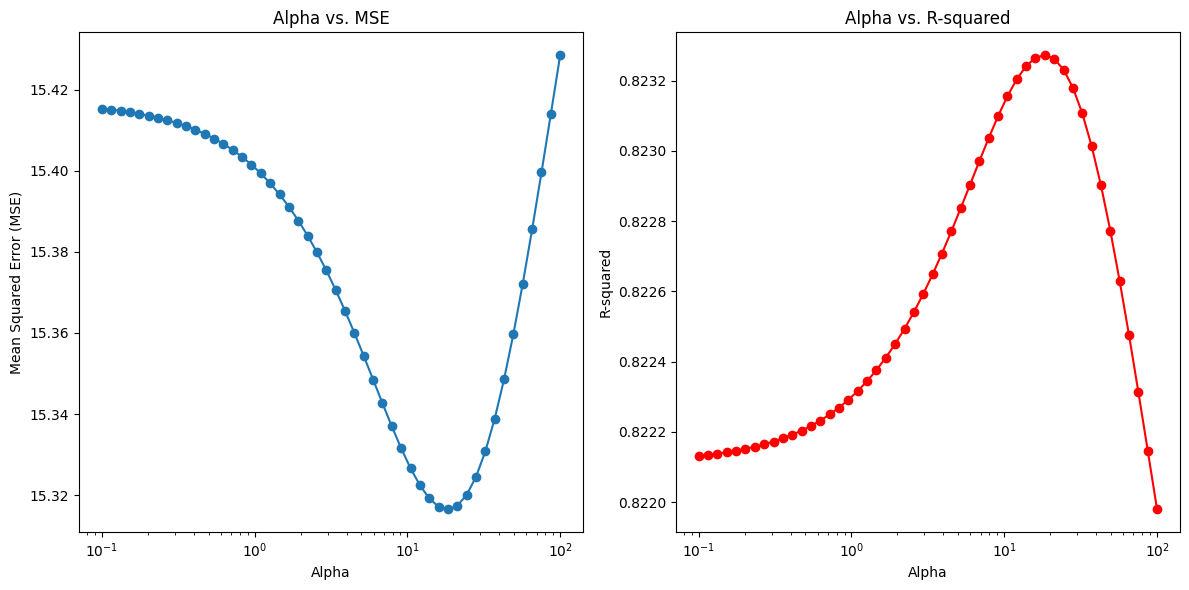

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = data.drop(columns=['Life expectancy '])
y = data['Life expectancy ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to test
alphas = np.logspace(-1, 2, 50)  # 50 values between 0.01 and 100

mse_values = []
r2_values = []

# Loop through alpha values, train the model, and calculate metrics
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)

    mse_values.append(mean_squared_error(y_test, y_pred_ridge))
    r2_values.append(r2_score(y_test, y_pred_ridge))

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot alpha vs. MSE
ax1.plot(alphas, mse_values, marker='o')
ax1.set_xscale('log')  # Use log scale for alpha
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax1.set_title('Alpha vs. MSE')

# Plot alpha vs. R-squared
ax2.plot(alphas, r2_values, marker='o', color='red')
ax2.set_xscale('log')  # Use log scale for alpha
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R-squared')
ax2.set_title('Alpha vs. R-squared')

plt.tight_layout()
plt.show()

In [ ]:
'''as shown by the graph we can test the values of 50>alpha>1'''
ridge_model = Ridge(alpha=18) #value of alpha manually found out for minimum MSE

# Train the Ridge Regression model
ridge_model.fit(X_train, y_train)

# Make predictions with Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}')


Ridge Regression - Mean Squared Error: 15.316454788064437, R^2 Score: 0.8232731001551873


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.37115e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


trying for lasso regression

In [ ]:
# X = data.drop(columns=["Life expectancy "])
# y = data["Life expectancy "]

# # Standardize the features for Lasso, as it’s sensitive to scale
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Initialize and train Lasso Regression model with alpha = 1
# lasso = Lasso(alpha=0.1)
# lasso.fit(X_train, y_train)

# # Predict on the validation set
# y_pred_lasso = lasso.predict(X_val)

# # Calculate Mean Squared Error and R^2 Score
# lasso_mse = mean_squared_error(y_val, y_pred_lasso)
# lasso_r2 = r2_score(y_val, y_pred_lasso)

# print("Lasso Regression - Mean Squared Error:", lasso_mse)
# print("Lasso Regression - R^2 Score:", lasso_r2)

Lasso Regression - Mean Squared Error: 16.481828753005992
Lasso Regression - R^2 Score: 0.8098265858779754


Hence for alpha=18,
Ridge Regression - Mean Squared Error: 15.316454788064437, R^2 Score: 0.8232731001551873
performed best

**INFRENCES**

Calculating the weights for their corresponding feature labels

In [ ]:
# Get the coefficients
coefficients = ridge_model.coef_

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

print(coef_df)

                            Feature   Coefficient
0                   Adult Mortality -2.149202e-02
1                     infant deaths  9.988357e-02
2                           Alcohol  1.224678e-01
3            percentage expenditure  6.630811e-05
4                       Hepatitis B -1.922166e-02
5                          Measles  -2.491508e-05
6                              BMI   4.104712e-02
7                under-five deaths  -7.399413e-02
8                             Polio  2.803072e-02
9                 Total expenditure  5.482980e-02
10                      Diphtheria   4.198802e-02
11                         HIV/AIDS -4.643849e-01
12                              GDP  4.988251e-05
13                       Population -1.374883e-09
14             thinness  1-19 years -1.049447e-01
15               thinness 5-9 years  9.420913e-03
16  Income composition of resources  4.069396e+00
17                        Schooling  7.476104e-01



testing on data available for india in 2014



In [ ]:
import numpy as np
# Assuming your Ridge model is already trained and named 'ridge_model'
# Also assuming you have a scaler named 'scaler' used for standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge Regression model with alpha=15
ridge_model = Ridge(alpha=18)

# Train the Ridge Regression model
ridge_model.fit(X_train_scaled, y_train)

def predict_life_expectancy():
    # Define the feature names
    feature_names = [
        'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
        'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
        'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
        'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling'
    ]

    # Initialize an empty list to store the input features
    input_features = []

    # Collect input features one by one
    for feature in feature_names:
        value = float(input(f"Enter value for {feature}: "))
        input_features.append(value)

    # Convert the list to a numpy array
    input_features = np.array(input_features)

    # Standardize the input features
    input_features_scaled = scaler.transform([input_features])
    # Predict life expectancy
    predicted_life_expectancy = ridge_model.predict(input_features_scaled)
    return predicted_life_expectancy[0]

In [ ]:
85# Example usage
predicted_life_expectancy = predict_life_expectancy()
print(f'Predicted Life Expectancy: {predicted_life_expectancy}')


Enter value for Adult Mortality: 184
Enter value for infant deaths: 957
Enter value for Alcohol: 3.07
Enter value for percentage expenditure: 86.5214
Enter value for Hepatitis B: 79
Enter value for Measles: 79563
Enter value for BMI: 18.1
Enter value for under-five deaths: 1200
Enter value for Polio: 84
Enter value for Total expenditure: 4.69
Enter value for Diphtheria: 85
Enter value for HIV/AIDS: 0.2
Enter value for GDP: 1573.119
Enter value for Population: 1293859294
Enter value for thinness 1-19 years: 26.8
Enter value for thinness 5-9 years: 27.4
Enter value for Income composition of resources: 0.607
Enter value for Schooling: 11.16
Predicted Life Expectancy: 66.36861159915841


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


the actual life expectancy in 2014 of india was 68.0 hence the model works fine
